<h1> Exploratory Data Analysis and Predicting Heart Disease using XGboost </h1>
This notebook will <b>Analyize</b> the data and build <b>XGboost Model</b> <br>


<h3> Notebook Contents : </h3>
1. Importing Libraries.<br>
2. Exploration of Data.<br>
3. Data Visualization.<br>
4. Data Standardization<br>
5. Spliting Data to Train and Test Data.<br>
6. Building Logistic Regression Model.<br>
7. Building Cost Function.<br>
8. Building Gradient Funtion.<br>
9. Training the Model.<br>
10. Prediction and Evalution.<br>

<center>
<img src = 'https://i0.wp.com/www.wellbeingmag.com/wp-content/uploads/2014/11/WB.InTheNews12887649Medium.jpg?fit=640%2C384'>
</center>

<h2> 1. Importing Libraries and Packages </h2>

In [1]:
import numpy as np 
import pandas as pd
import math 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
#%pip install --upgrade scikit-learn==0.23.0 #add code

#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from xgboost import XGBClassifier
#ensembling
from mlxtend.classifier import StackingCVClassifier

<h2> 2. Exploration of Data </h2>

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
df.shape

(4238, 16)

In [4]:
df.info() #to get data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.isnull().sum() #to get null data

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<h3> Treating Null Values </h3>

In [6]:
#treating null values based on every column
df['cigsPerDay'][df['cigsPerDay'].isnull() == True ] = round(np.mean(df['cigsPerDay']) , 0)
df['BPMeds'][df['BPMeds'].isnull() == True] = 1 
df['totChol'][df['totChol'].isnull() == True ] = np.mean(df['totChol'])
df['BMI'][df['BMI'].isnull() == True ] = np.mean(df['BMI'])
df['heartRate'][df['heartRate'].isnull() == True ] = np.mean(df['heartRate'])
df['glucose'][df['glucose'].isnull() == True ] = np.mean(df['glucose'])
df['education'][df['education'].isnull() == True ] = round(np.mean(df['education']) , 0)

In [7]:
#checking if there is still a null value
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean      0.429212    49.584946     1.979471       0.494101     9.003067   
std       0.495022     8.572160     1.007081       0.500024    11.879230   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4238.000000      4238.000000   4238.000000  4238.000000  4238.000000   
mean      0.041765         0.005899      0.310524     0.025720   236.721585   
std       0.200075         0.076587      0.462763     0.158316    44.326453   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   262.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.070953    12.025177    22.836603   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    72.000000   
50%     128.000000    82.000000    25.410000    75.000000    80.000000   
75%     144.000000    89.875000    28.037500    83.000000    85.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [9]:
#creating continous/discrete feature name list

contFeat = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose']
discreteFeat = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes']
discreteFeat_withy = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes' , 'TenYearCHD']

<h2>3. Data Vislualization </h2>

<h3>Pair Plot</h3> 

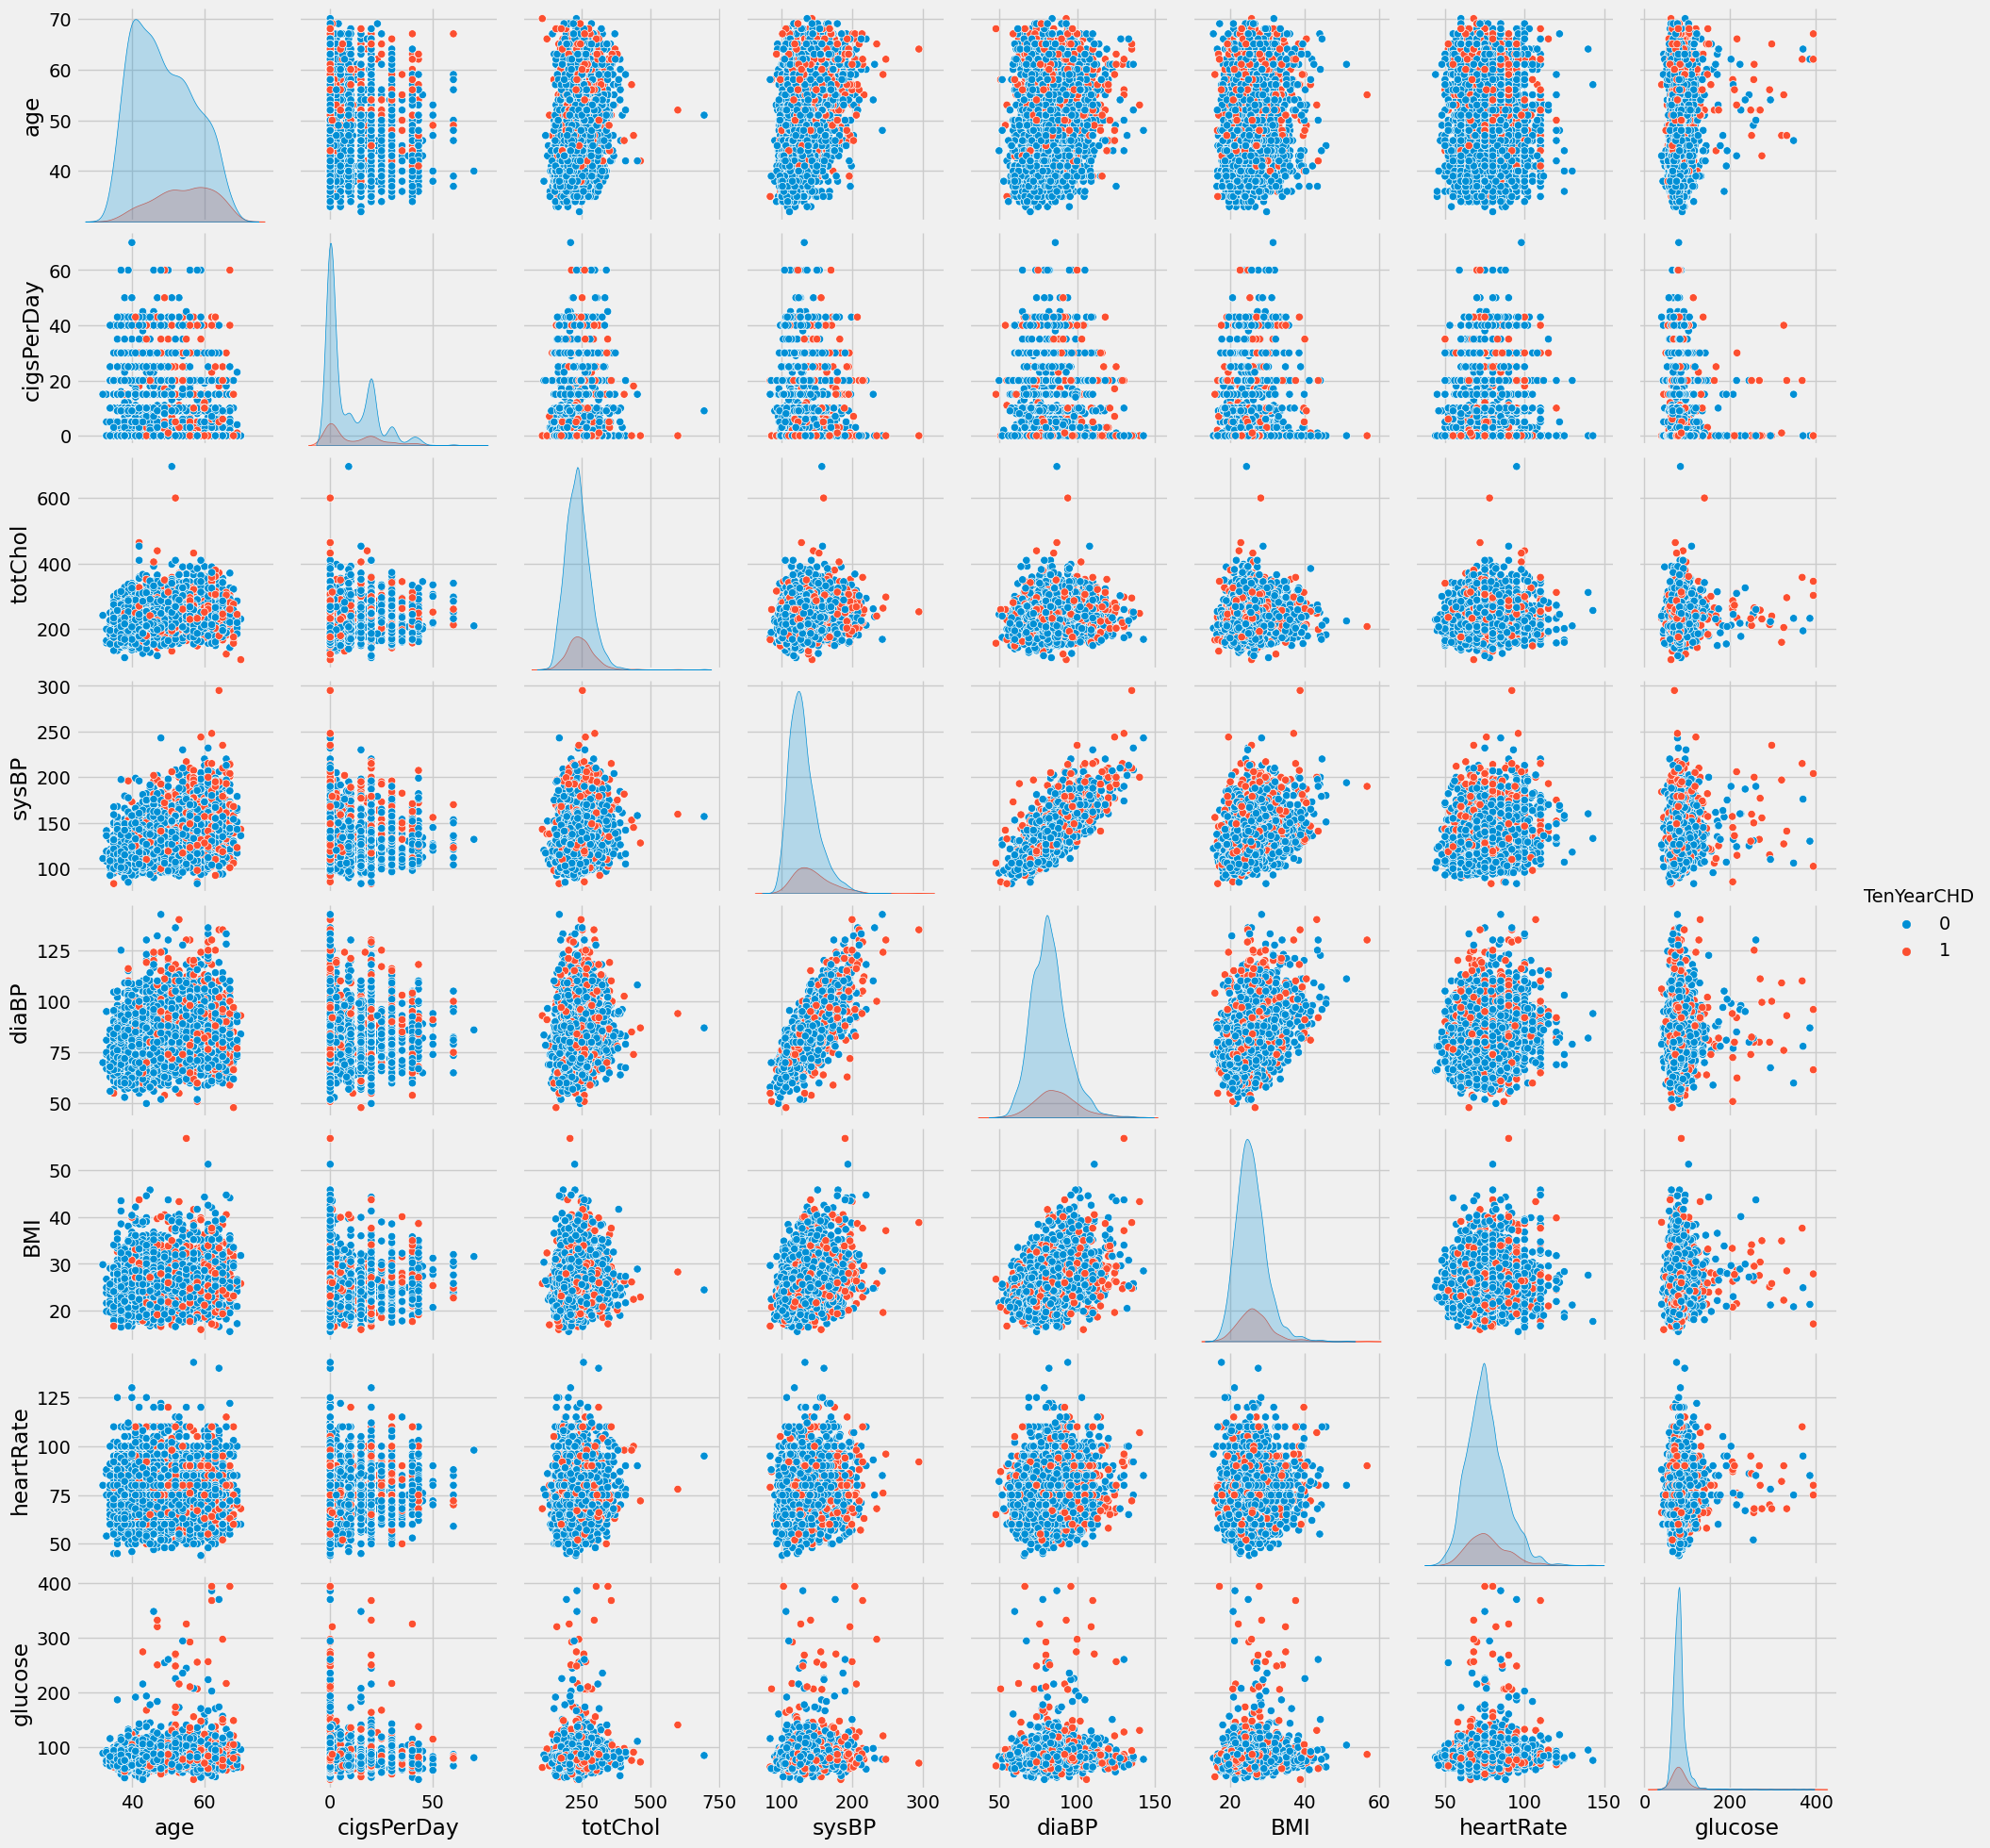

In [10]:
plt.style.use('fivethirtyeight')

sns.pairplot(df , hue = 'TenYearCHD',
             vars = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose'])
plt.show()

<h3> Insightful Count Plots </h3>

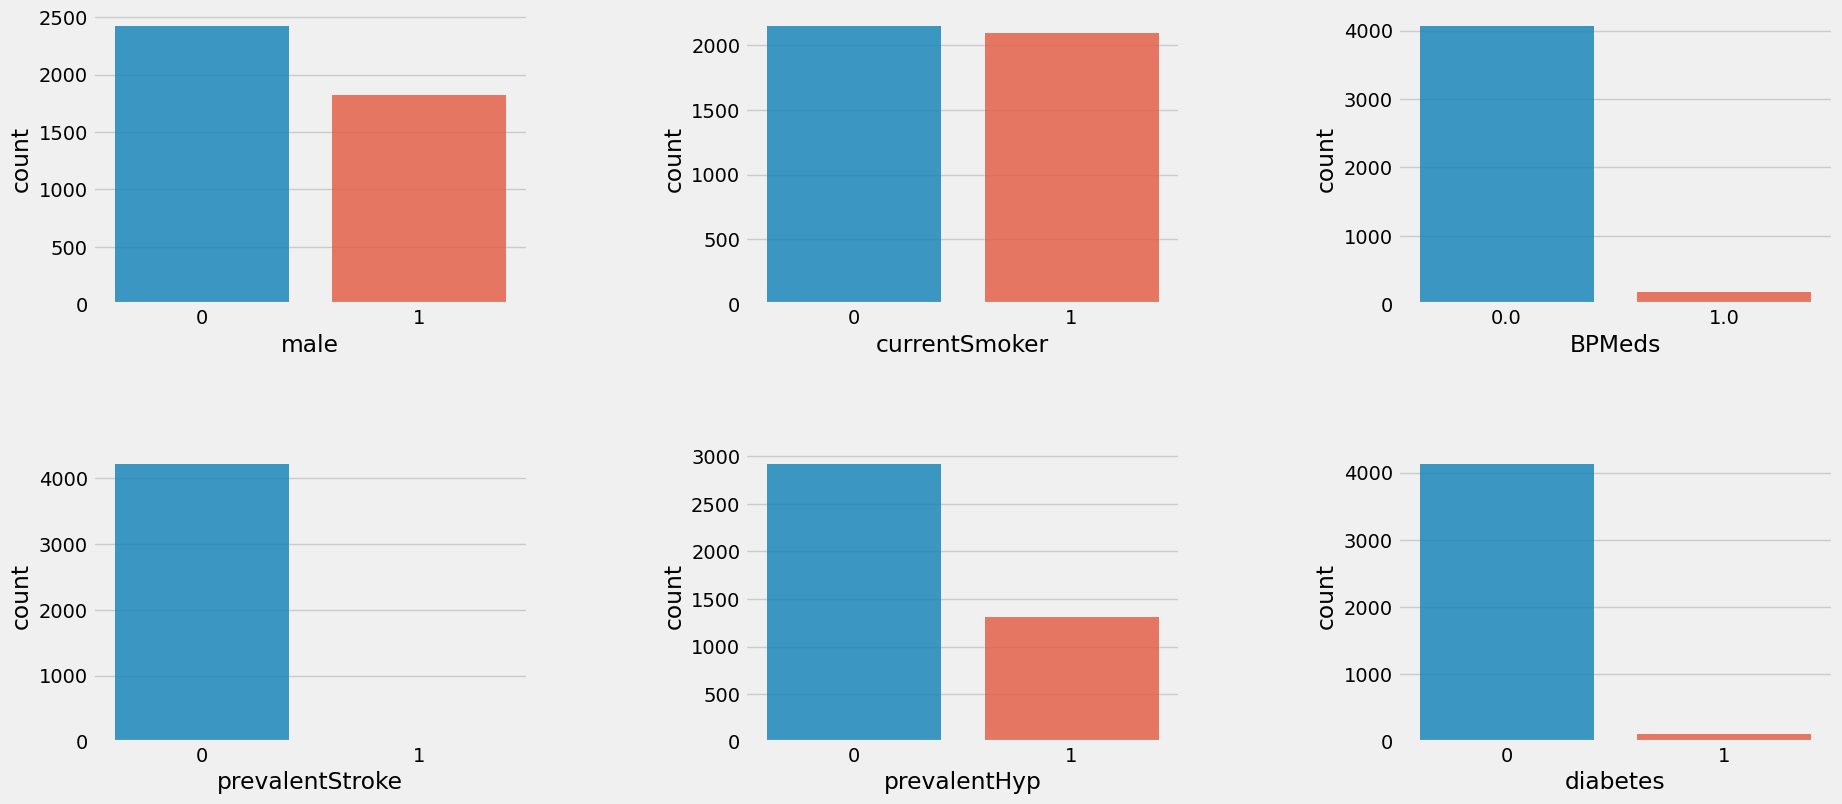

In [11]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , data = df , alpha = 0.85)

plt.show()

<h3> Insightful Count Plots w.r.t the Dependent Variable </h3> 

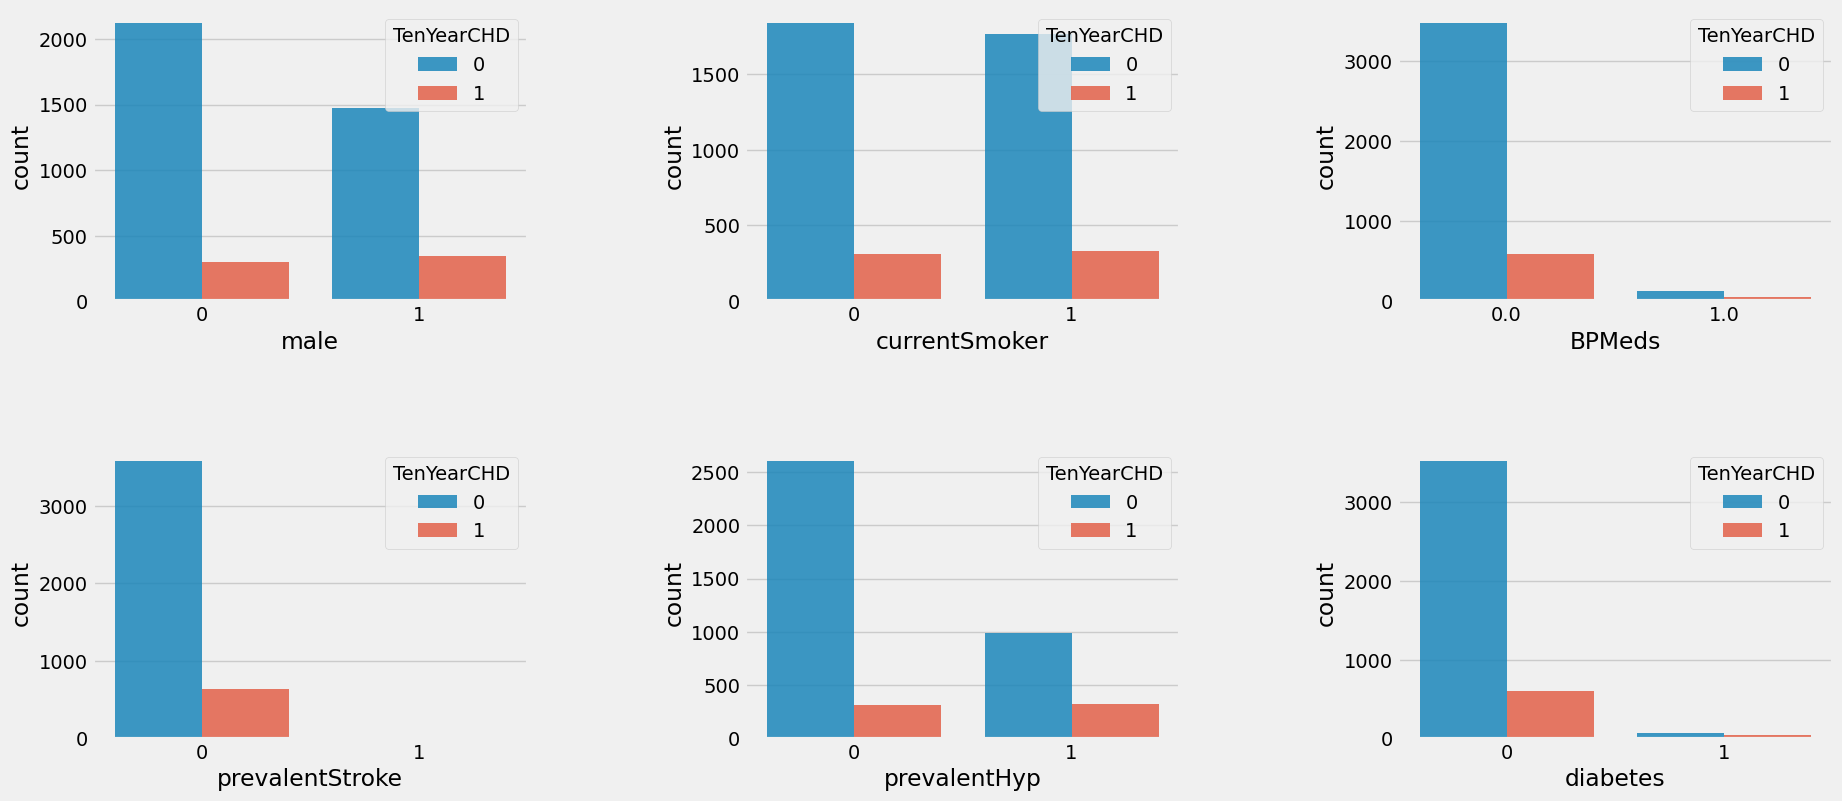

In [12]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , hue = 'TenYearCHD' , data = df , alpha = 0.85)

plt.show()

<h3> Histograms </h3>

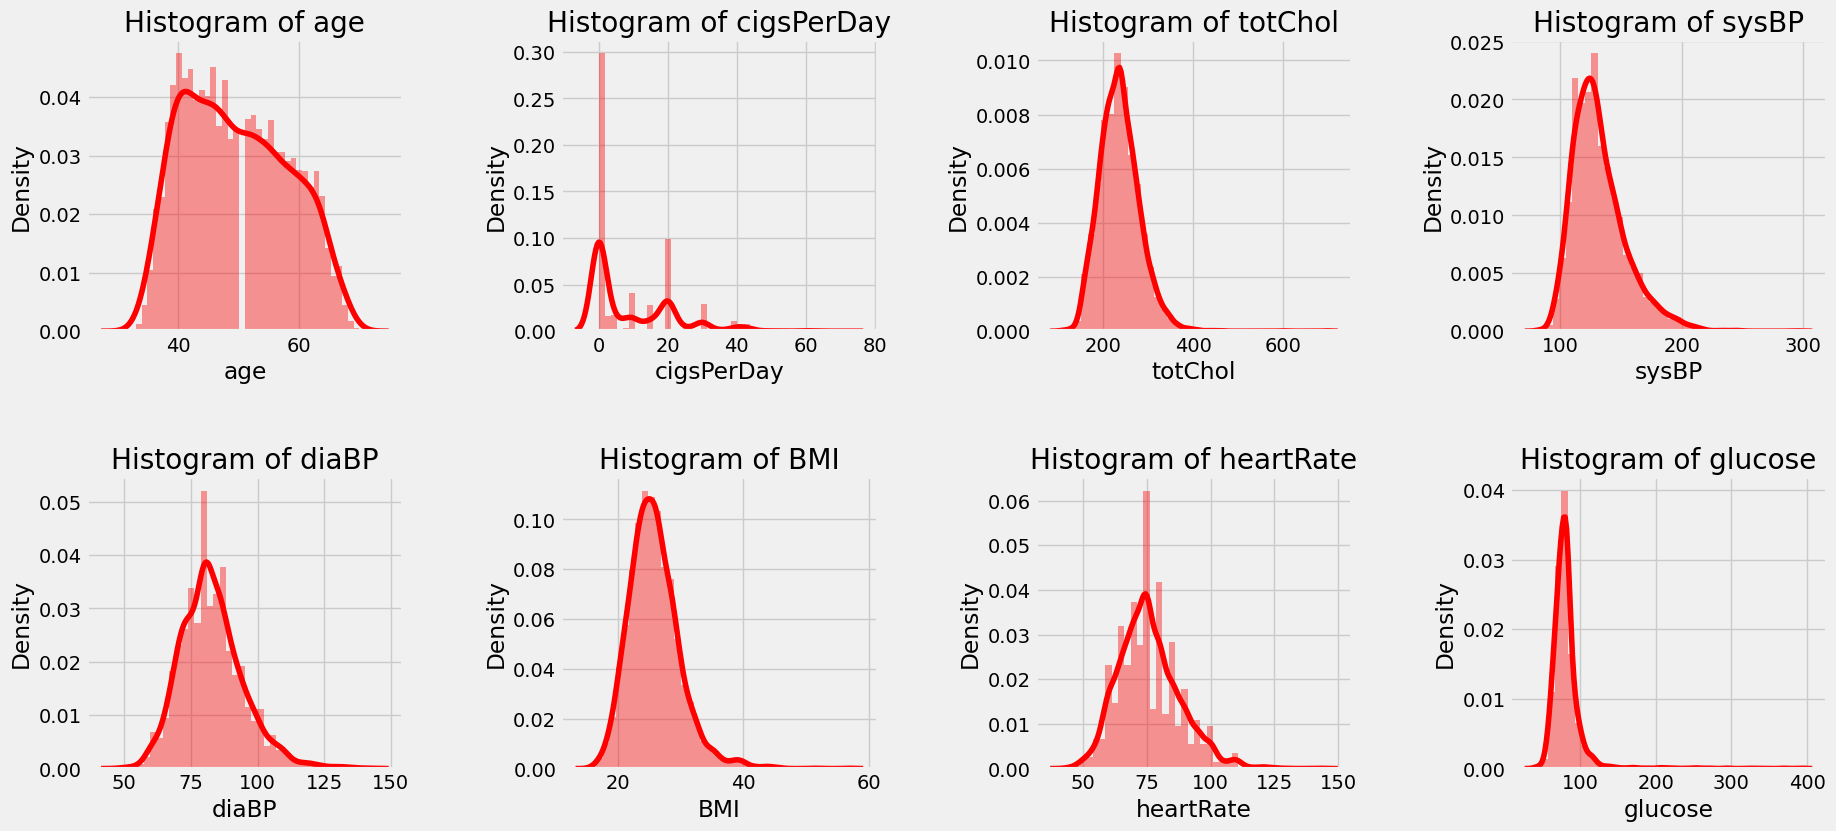

In [13]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in contFeat:
    n += 1
    plt.subplot(2 , 4  , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[f] , bins = 40 , color = 'red')
    plt.title('Histogram of {}'.format(f))

plt.show()

<h3> Histograms w.r.t the Dependent Variable </h3>

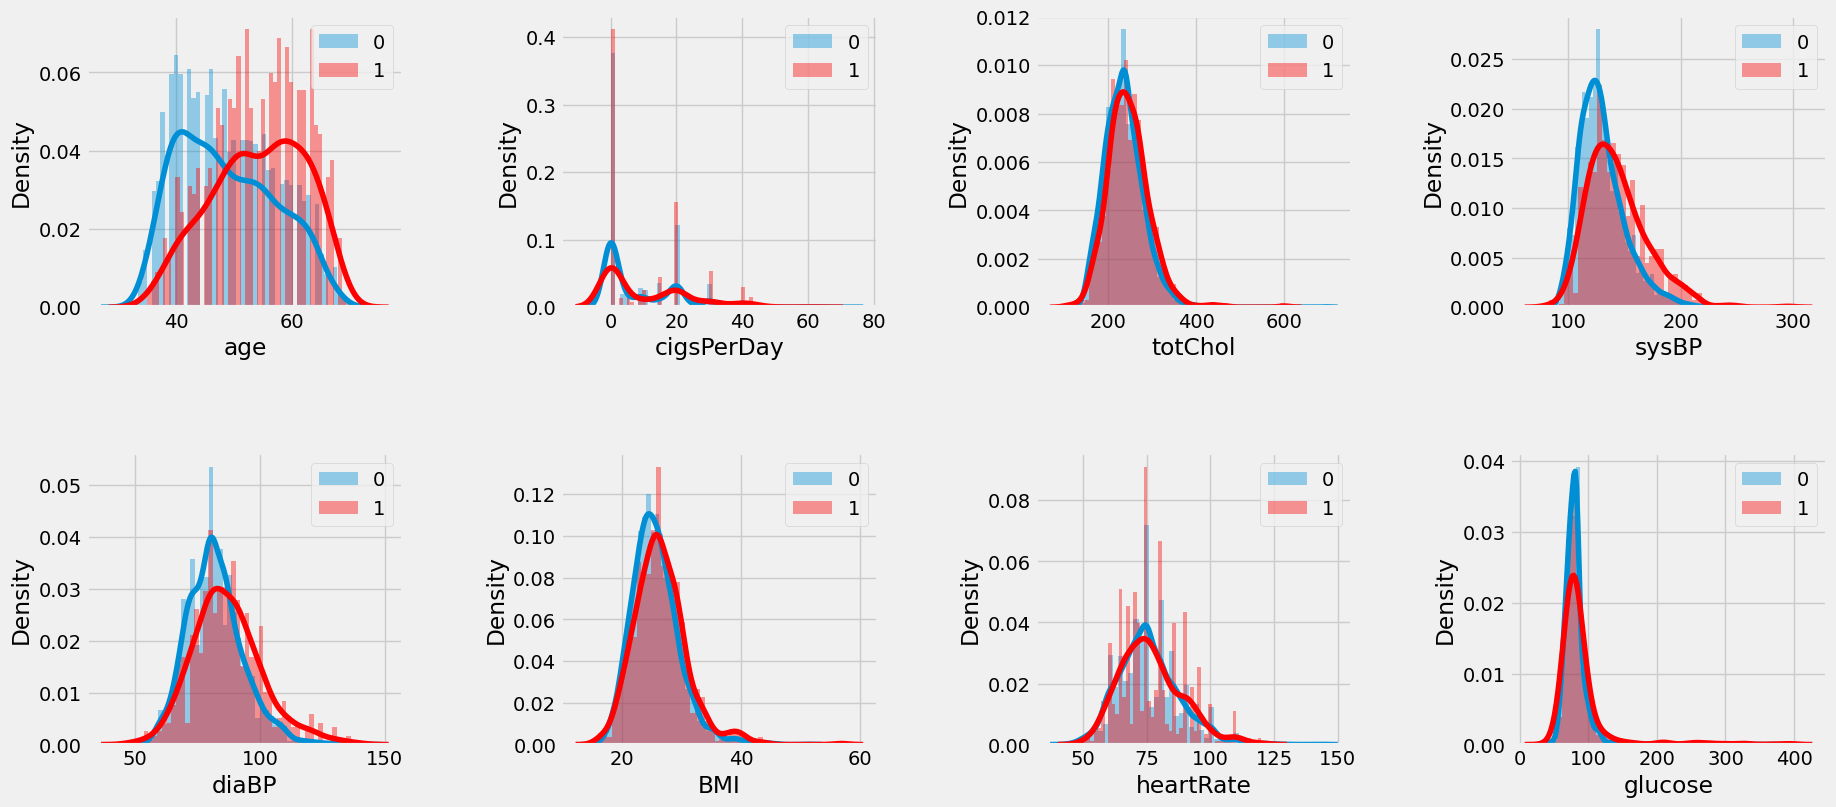

In [14]:
plt.figure(1 , figsize = (20 , 9))
n = 0
for f in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[f][df['TenYearCHD'] == 0] , bins = 50 , label = '0')
    sns.distplot(df[f][df['TenYearCHD'] == 1] , bins = 50 , color = 'red' , label = '1')
    plt.legend()
    
plt.show()

<h3>Analyzing Features w.r.t Age</h3>

In [15]:
def scatter_plot(x , y , hue , label1 , label2 , s1 = 50 , s2 = 100):

    plt.scatter(x = x , y = y , s = s1 , data = df[df[hue] == 0] , 
                label = label1 , alpha = 0.8 )

    plt.scatter(x = x , y = y , s = s2 , data = df[df[hue] == 1] , 
                label = label2 , color = 'red' , alpha = 0.5 )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

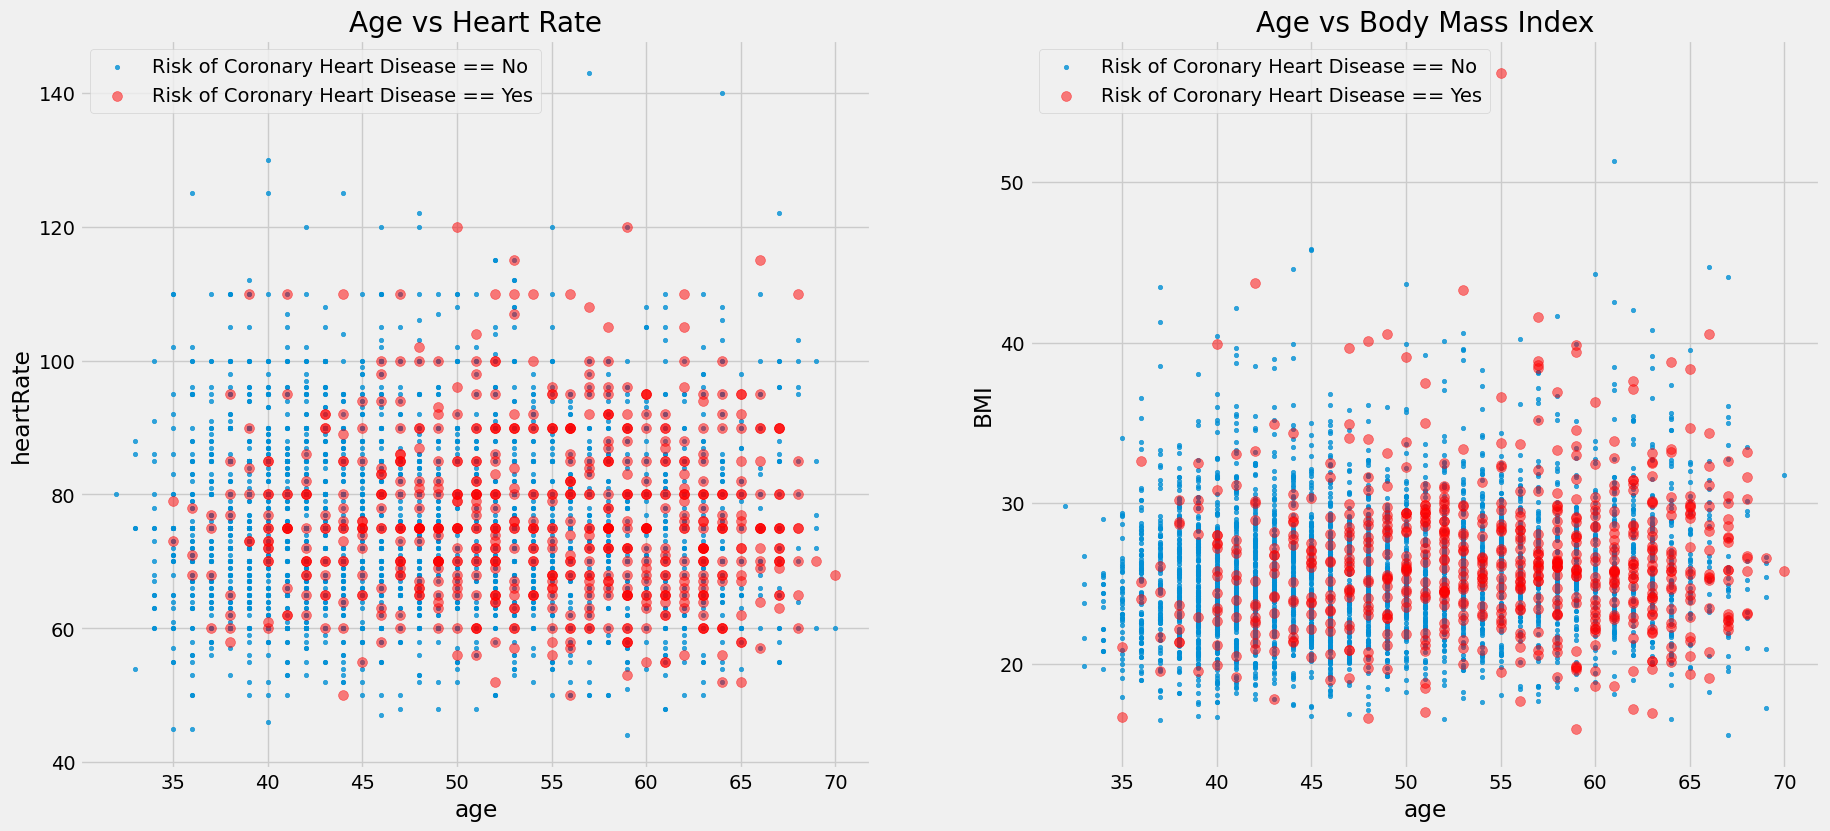

In [16]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'heartRate' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Heart Rate')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'BMI' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Body Mass Index')

plt.show()


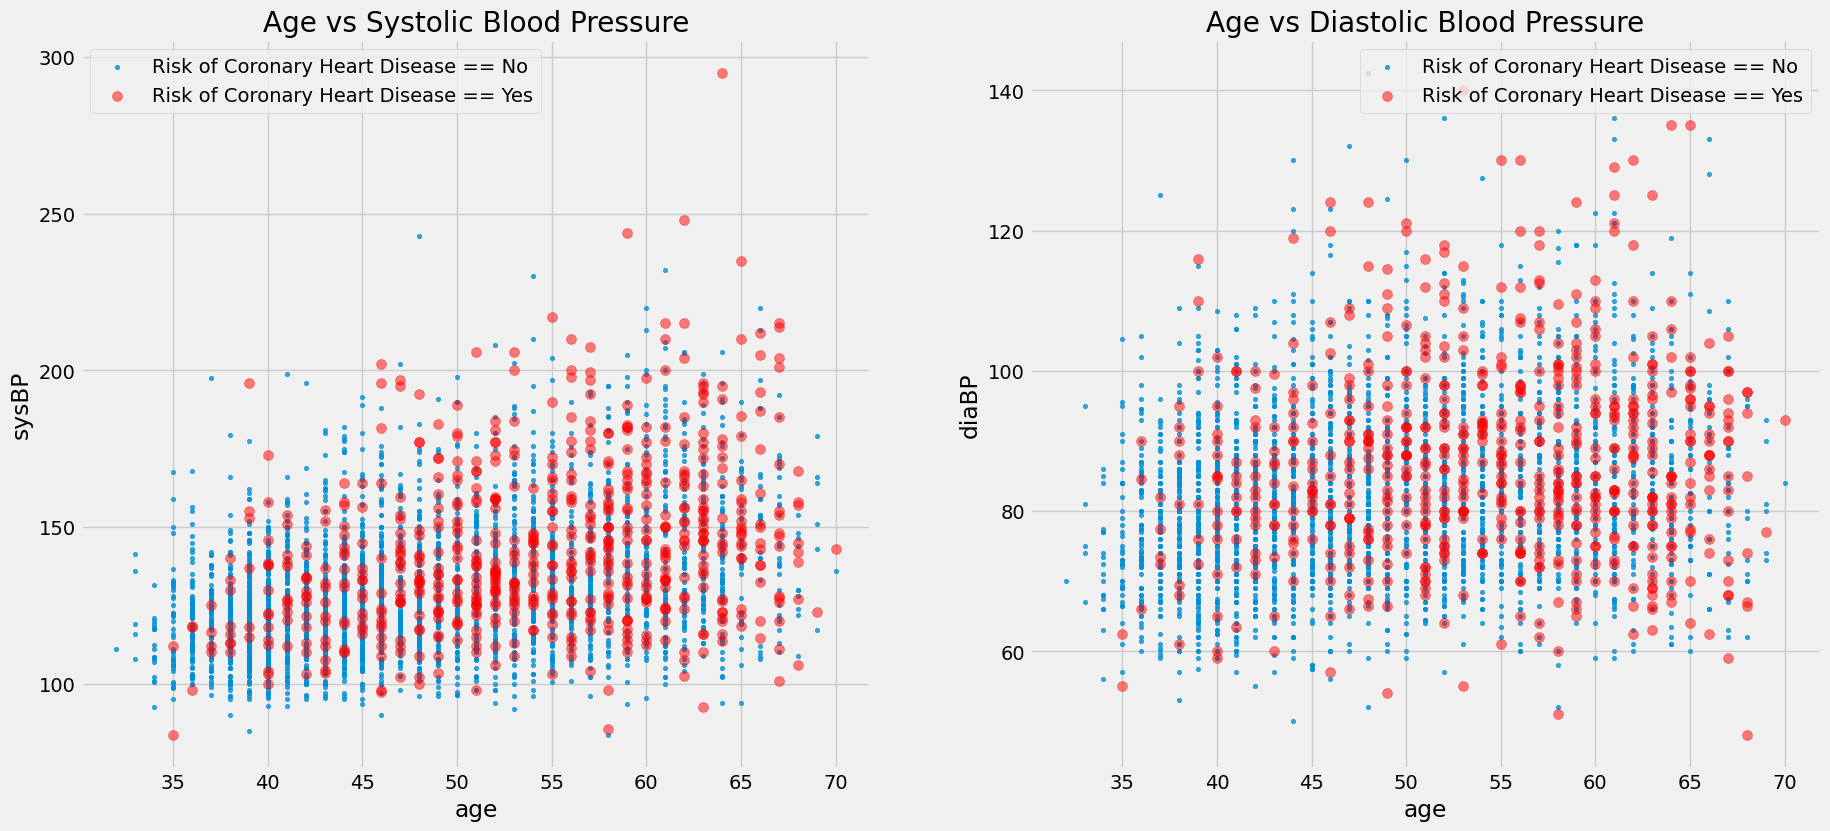

In [17]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'sysBP' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Systolic Blood Pressure')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'diaBP' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Diastolic Blood Pressure')


plt.show()


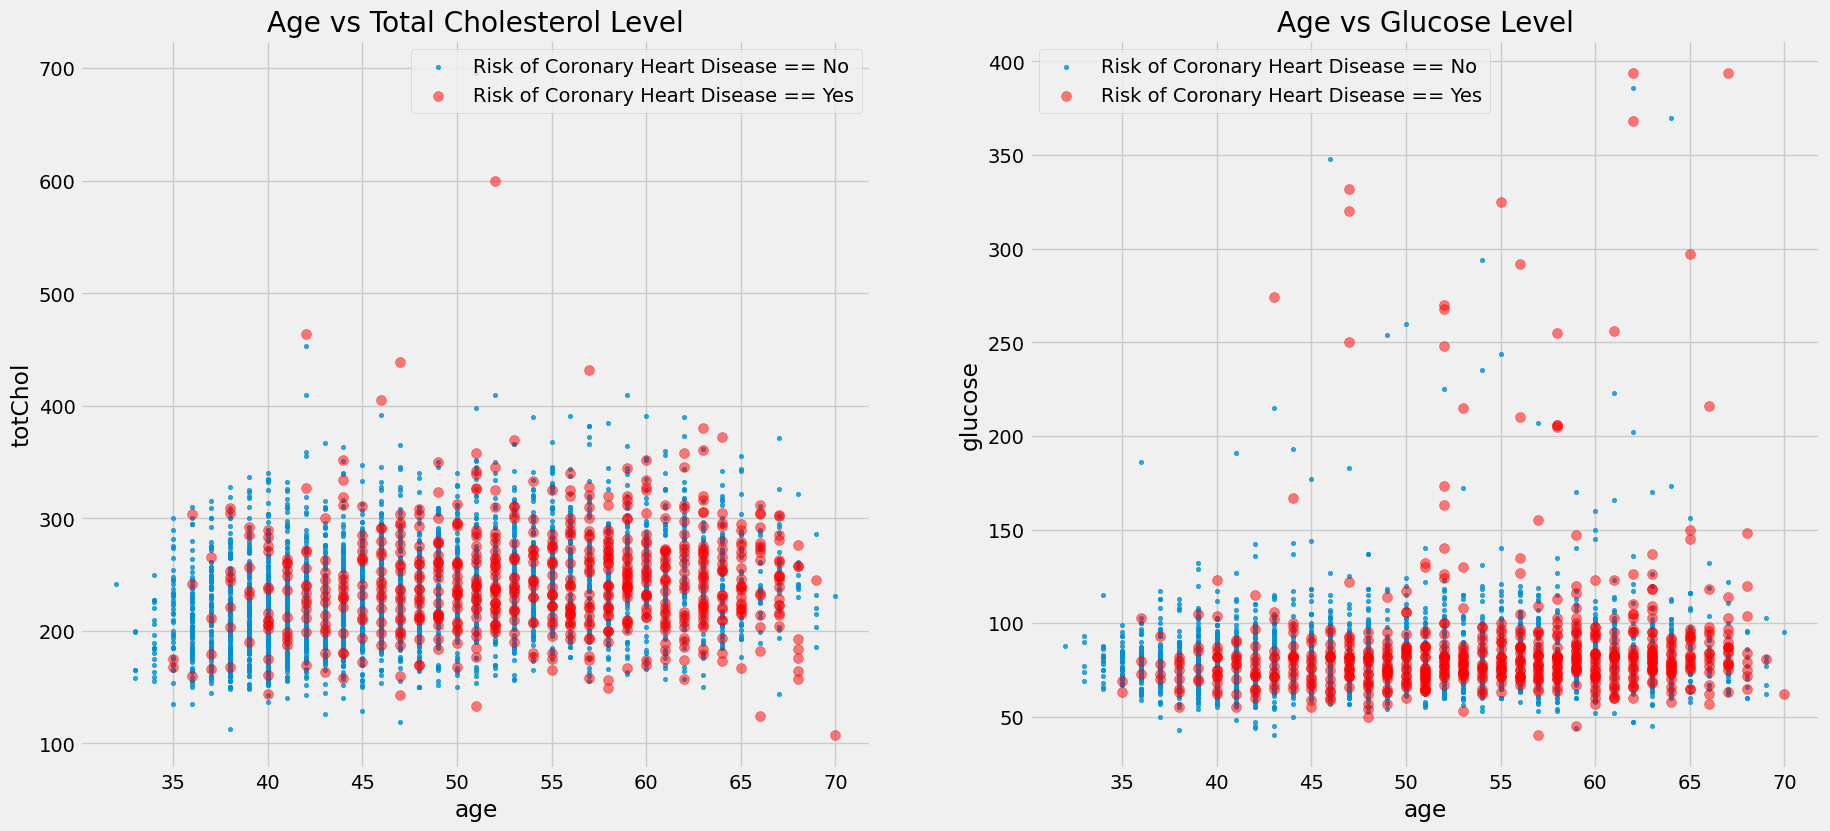

In [18]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'totChol' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Total Cholesterol Level')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'glucose' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Glucose Level')


plt.show()


<h3> Heatmap </h3>

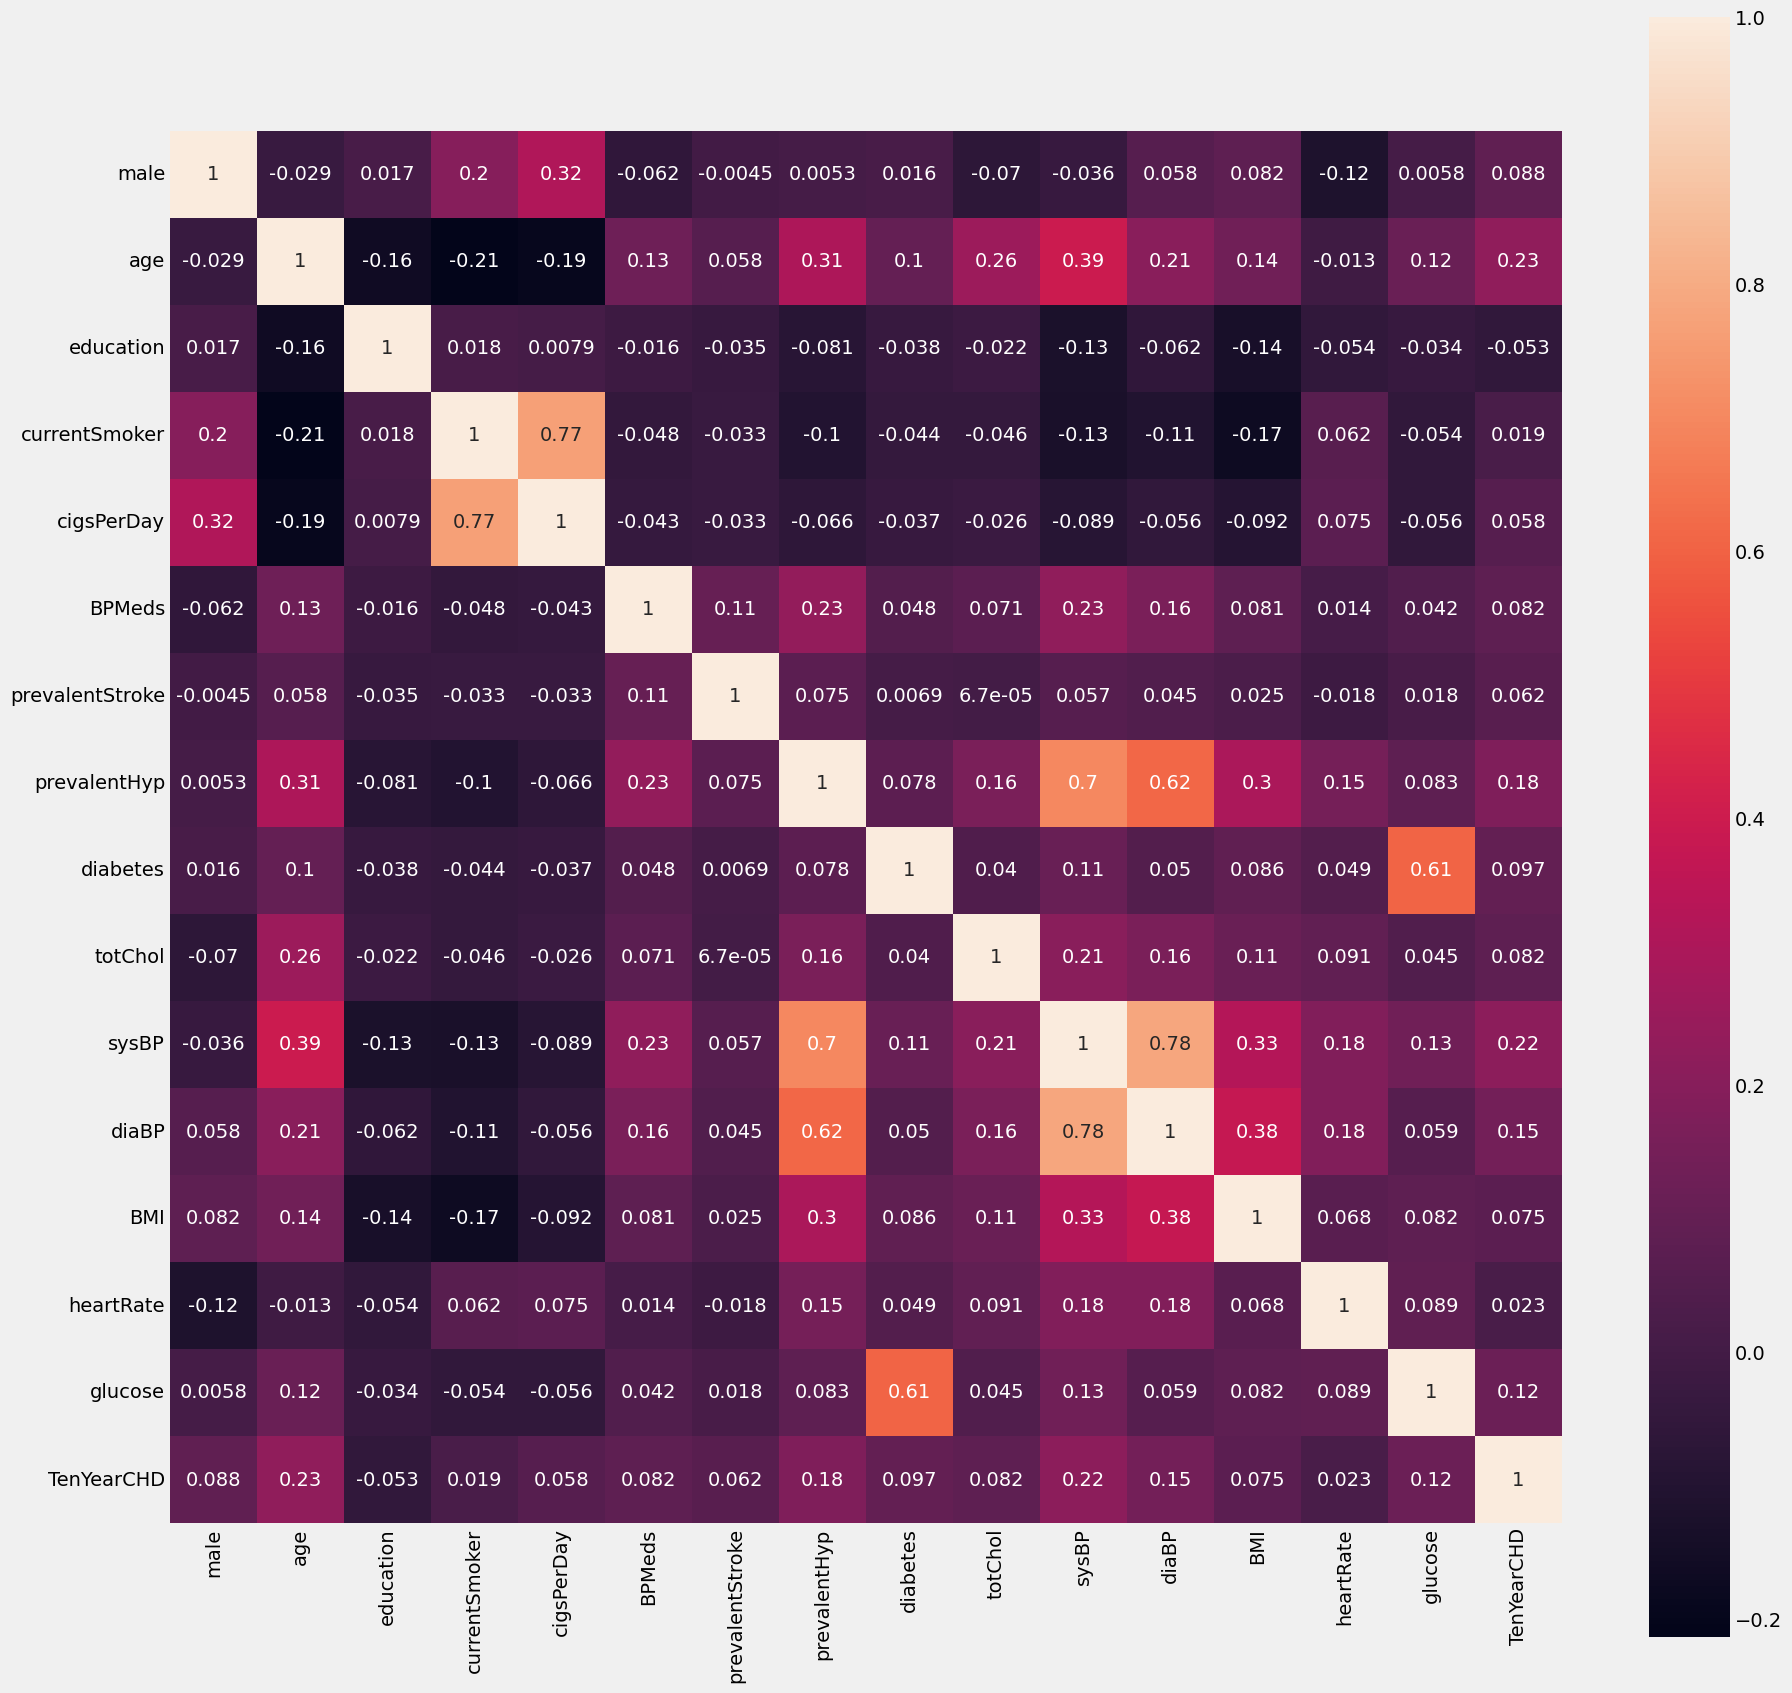

In [19]:
corrmat =  df.corr()

plt.figure(1 ,figsize = (20 , 20))
sns.heatmap(corrmat, annot = True , square  = True)
plt.show()

<h3>Systolic Blood Pressuer and Diastolic Blood Pressure are highly correlated to eachother</h3>

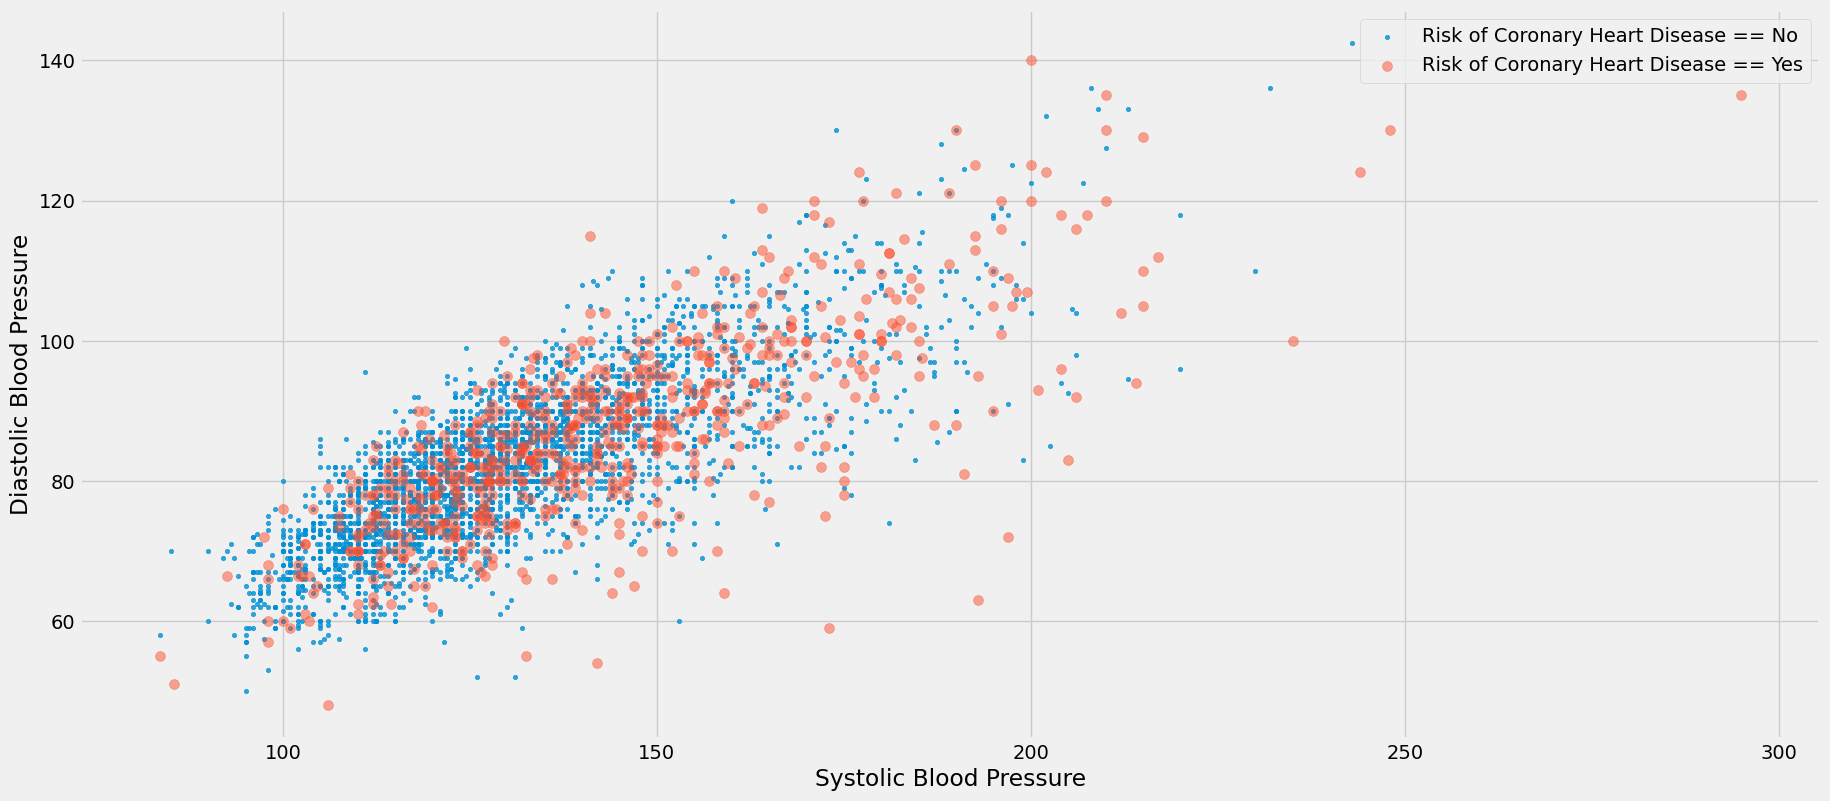

In [20]:
plt.figure(1 , figsize = (20 , 9))

plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 10 , data = df[df['TenYearCHD'] == 0] , 
            label = 'Risk of Coronary Heart Disease == No' , alpha = 0.8 )
plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 50 , data = df[df['TenYearCHD'] == 1] , 
            label = 'Risk of Coronary Heart Disease == Yes' , alpha = 0.5 )

plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.legend()

plt.show()

<h3>Boxplot</h3>

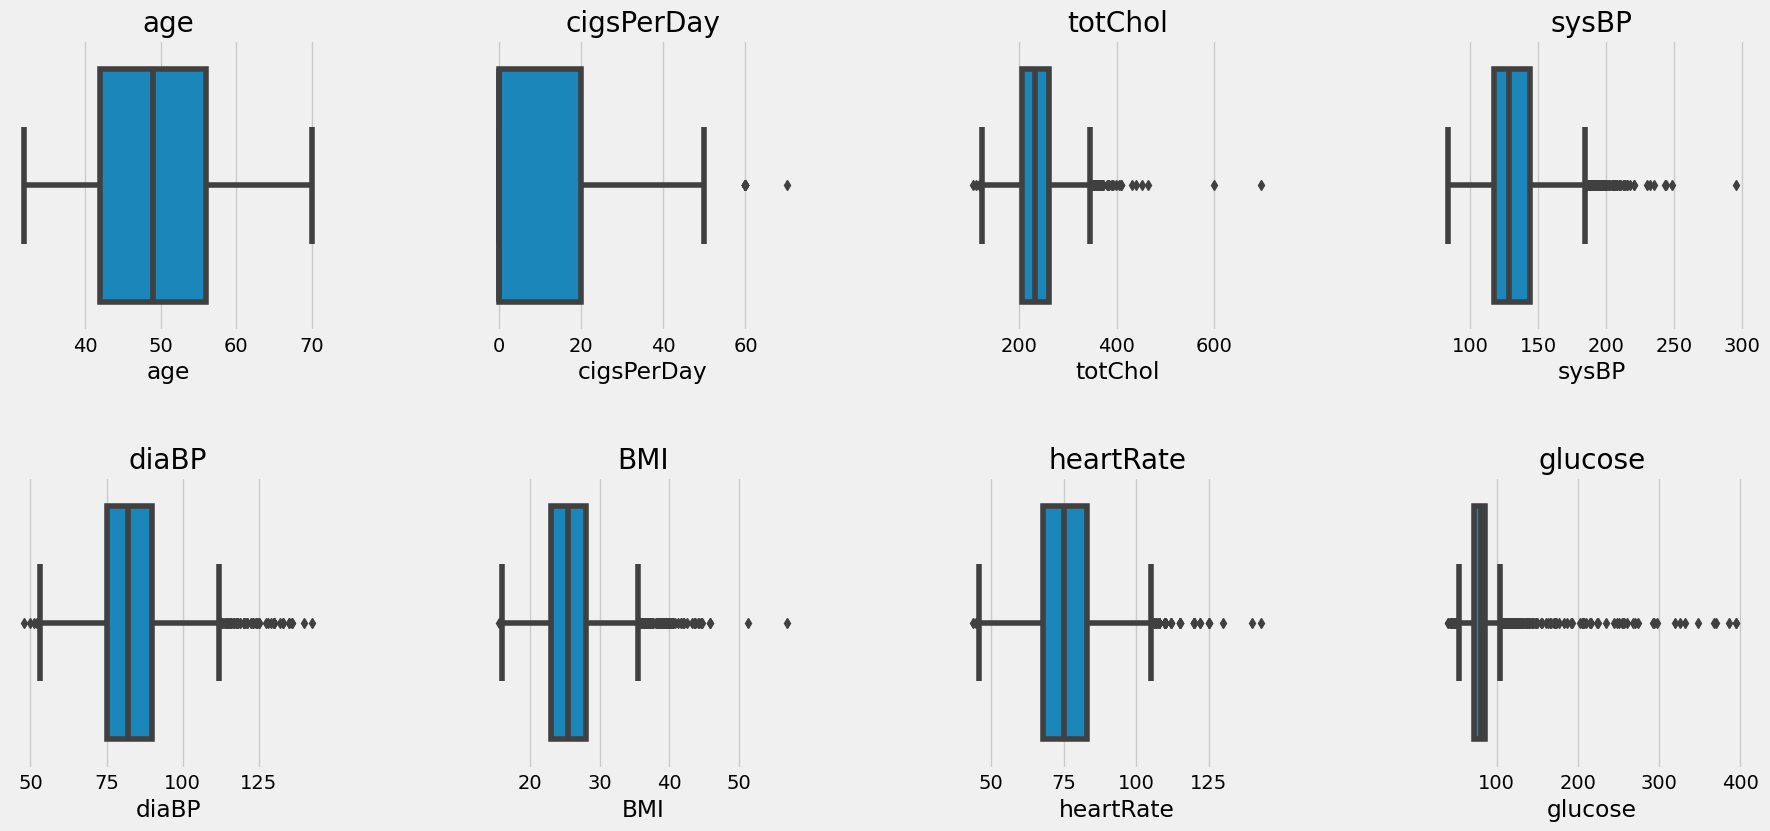

In [21]:
plt.figure(1 , figsize = (20 , 9))

n =  0
for x in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

<h2> Treating Outliers </h2>

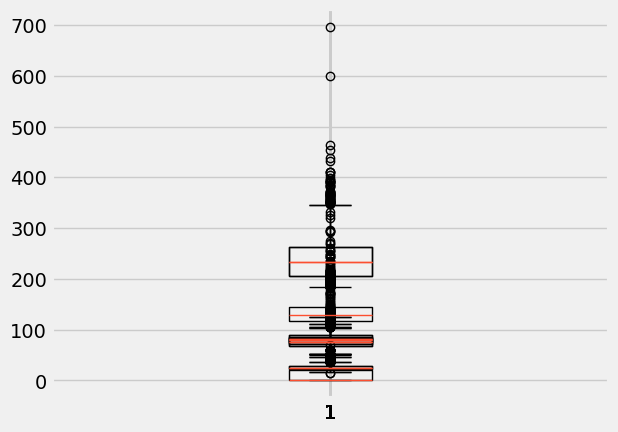

In [22]:
'''treating outliers '''
treating_feature = ['cigsPerDay' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

'''
upper outliers treatment - replacing with upper whisker
'''
for x in treating_feature:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    upper_whisker = values[1]
    df[x][df[x] > upper_whisker] = upper_whisker

'''
lower outliers treatment - replacing with lower whisker
'''
treating_feature_lower = [ 'totChol' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

for x in treating_feature_lower:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    lower_whisker = values[0]
    df[x][df[x] < lower_whisker] = lower_whisker


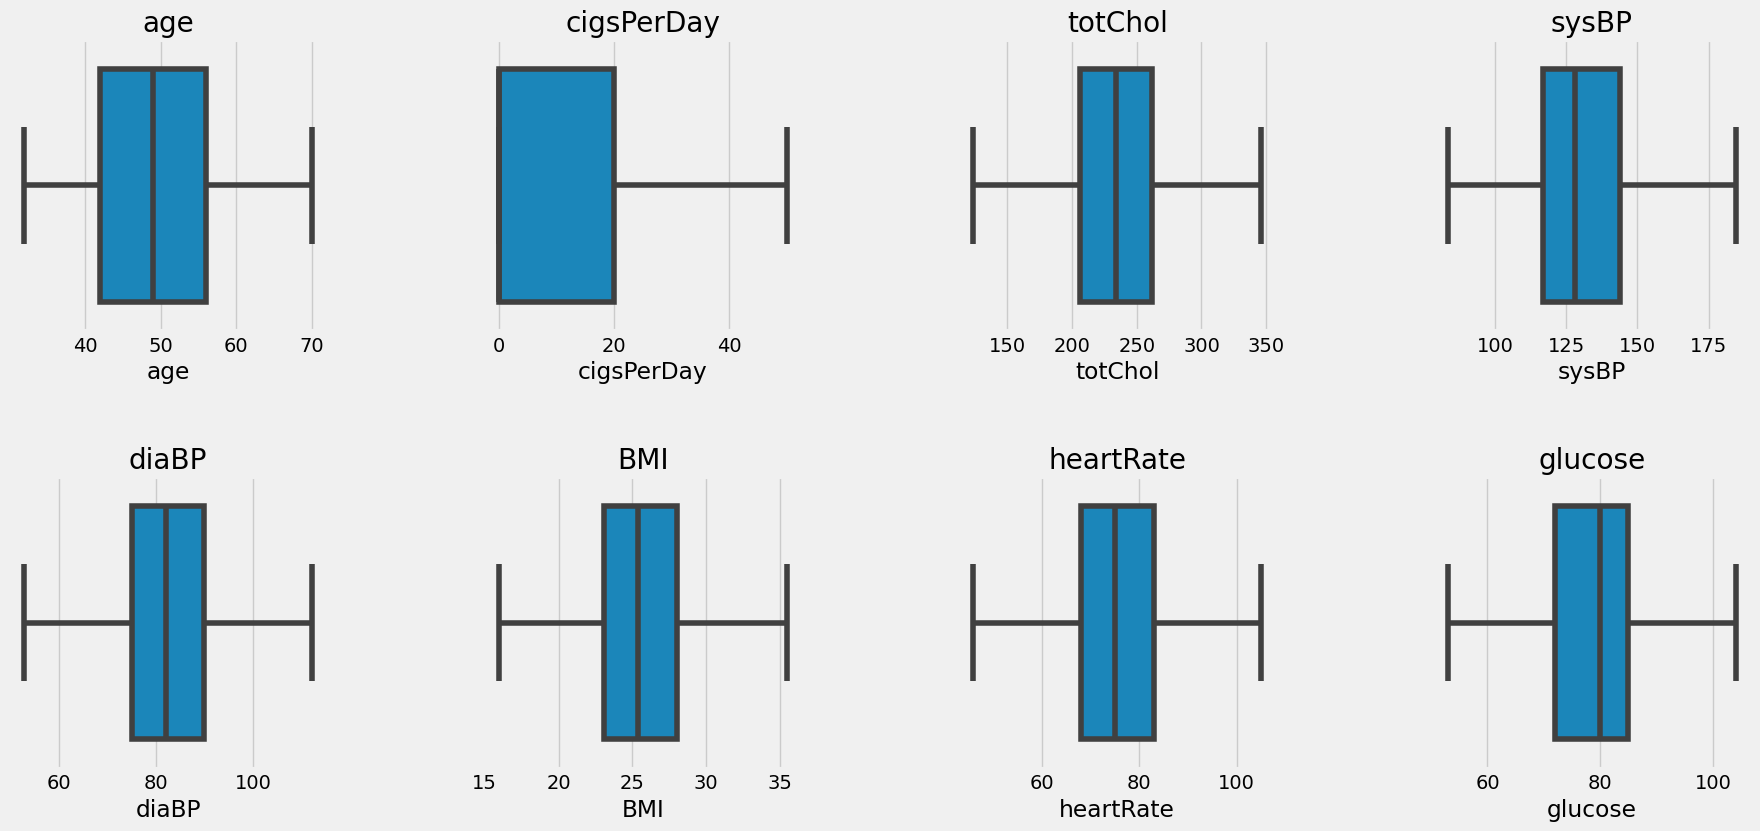

In [23]:

'''
Boxplot after outlier treatment
'''
plt.figure(1 , figsize = (20 , 9))

n =  0
for x in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

<h2> 4. Data Standardization </h2>

In [24]:
'''Standardizing Data'''
x = df.iloc[: , :15].values

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

ModuleNotFoundError: No module named 'sklearn'

<h2> 5. EDA </h2>

In [25]:
pp.ProfileReport(df)

NameError: name 'pp' is not defined

<h2> 6. Model Preparation </h2>
<h4> Checking whether the data is equally splitted or not, to avoid data imbalacing problem </h4>

In [ ]:
X=df.drop(['education','TenYearCHD'], axis=1)
y=df['TenYearCHD']

X_clean=X
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
si.fit(X[['BPMeds']])
pd.DataFrame(si.transform(X[['BPMeds']]))
si2=SimpleImputer(strategy='mean')
si2.fit(X)
X_clean=pd.DataFrame(si2.transform(X_clean))

In [ ]:
#check if there is na data
X_clean.isna().any()

In [ ]:
#Using SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X_clean, y)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X_ros,y_ros,test_size=0.2,random_state=0)

In [ ]:
X_train.head()

In [ ]:
#resetting column indexes
X_train.columns= X.columns   
X_valid.columns= X.columns
X_train.head()

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_valid=pd.DataFrame(sc.transform(X_valid))
X_train.head()

In [ ]:
#Scaling removed column indexes here i reset them
X_train.columns= X.columns   
X_valid.columns= X.columns

y_train.index= X_train.index
y_valid.index= X_valid.index

In [ ]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

<h2>7. Building XGBoost</h2>

In [ ]:
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier(colsample_bytree= 0.6,
                                 eval_metric= 'logloss',
                                 gamma= 2,
                                 learning_rate= 0.1,
                                 max_depth= 5,
                                 min_child_weight= 1,
                                 subsample= 0.8,
                                 use_label_encoder=False,
                                 verbosity = 0)
xgb_classifier.fit(X_train_sig, y_train)
y_pred_xgb = xgb_classifier.predict(X_valid_sig)
accuracy_score(y_valid,y_pred_xgb)
print('XGBoost Accuracy Score: ',accuracy_score(y_valid, y_pred_xgb))
my_confusion_matrix(y_valid, y_pred_xgb, 'XGBoost Confusion Matrix')

<h2>8. Conclusion</h2>

<b>1)In comparison to other models, Extreme Gradient Boosting demonstrates superior accuracy.
    2)Chest pain caused by exercise is a significant indicator of a heart attack.
    3)Employing ensembling techniques enhances the model's accuracy.</b>

<h1> Thank You </h1>